# **Wiktor Ciołek LSED lab6 31.05.2024**

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.naive_bayes import GaussianNB
from scipy.stats import multivariate_normal as mvnorm

plt.rcParams['font.size'] = 18
plt.rcParams['axes.grid'] = True

In [88]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
# data = pd.concat([pd.DataFrame(X, columns=iris['feature_names']), pd.Series(iris.target, name='target')], axis=1)
# data

# Scaler choice
We see that for one estimator, the best score is obtain when no scaling is used. Next, we will use none then. Distance metric and num. of neighbours will be chosen.

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_knn__metric', 'param_knn__n_neighbors', 'param_scaler', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'metric', 'scaler'],
      dtype='object')


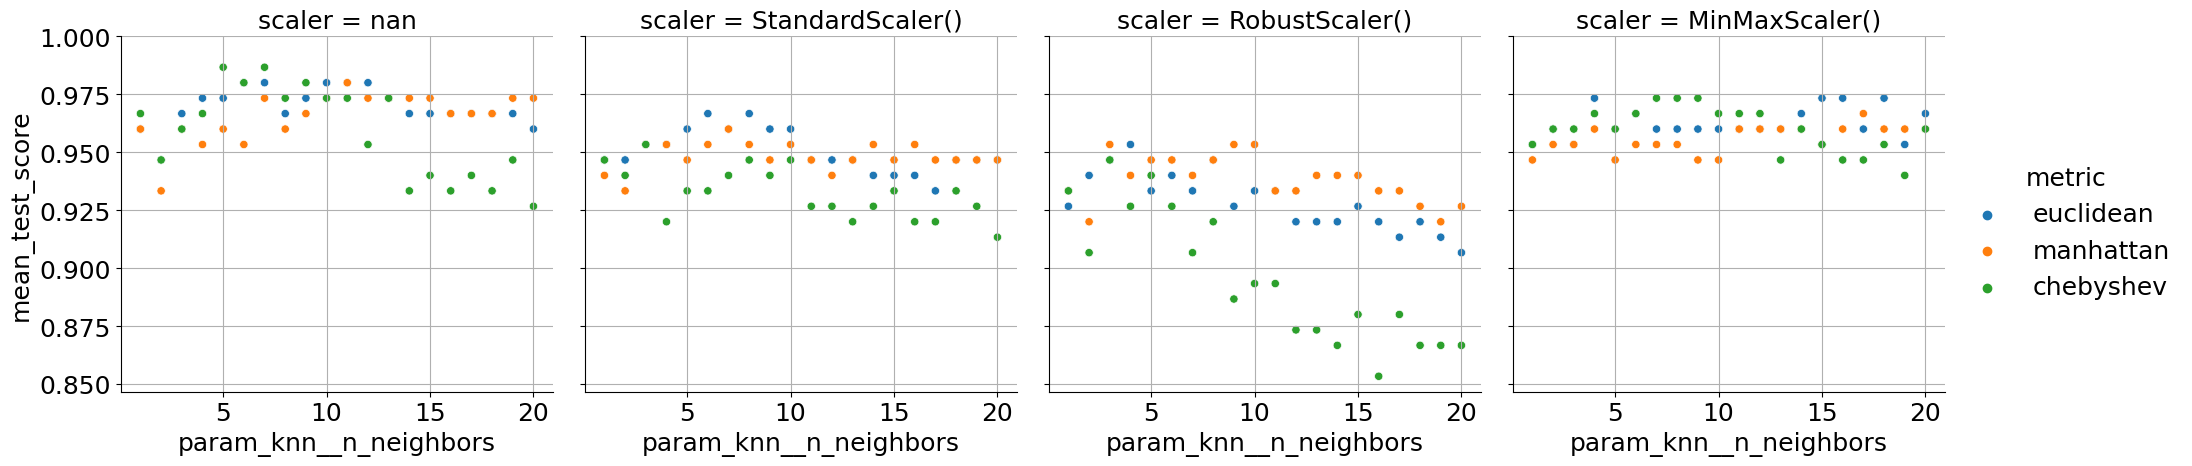

In [106]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, RobustScaler
import seaborn as sns

pipe = Pipeline([
    ('scaler', None),
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'scaler': [None, StandardScaler(), RobustScaler(), MinMaxScaler()],
    'knn__n_neighbors': range(1, 21),
    'knn__metric': ['euclidean', 'manhattan', 'chebyshev']
}

clf_grid = GridSearchCV(pipe, param_grid=param_grid)
clf_grid.fit(X, y)

out = pd.DataFrame.from_dict(clf_grid.cv_results_)
out["metric"]=out["param_knn__metric"].apply(pd.Series).astype(str)
out["scaler"]=out["param_scaler"].apply(pd.Series).astype(str)
print(out.columns)

g = sns.relplot(data = out, x = "param_knn__n_neighbors", y = "mean_test_score", hue='metric', col='scaler')
g.set(ylim=(None, 1))

<Figure size 2000x1000 with 0 Axes>

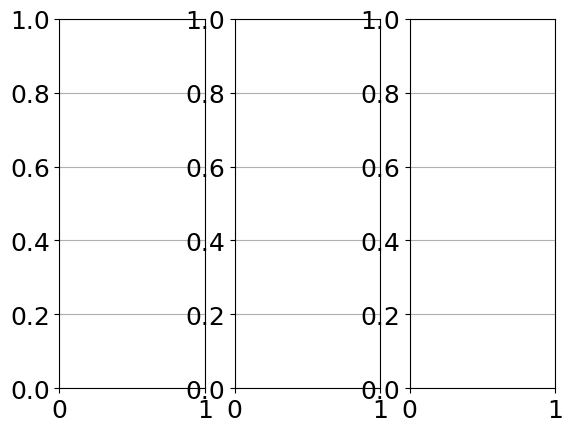

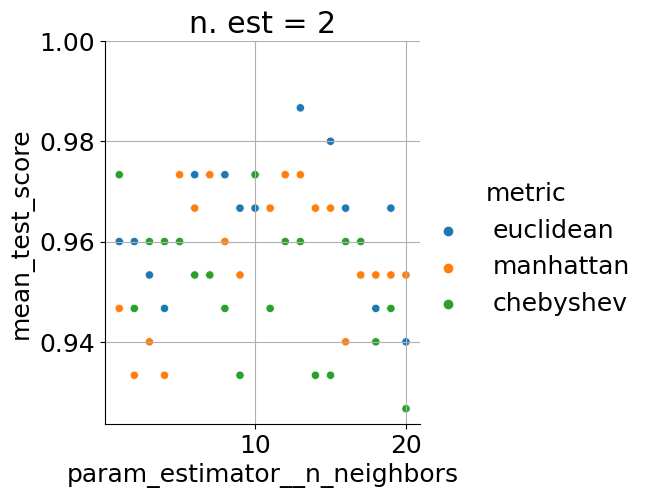

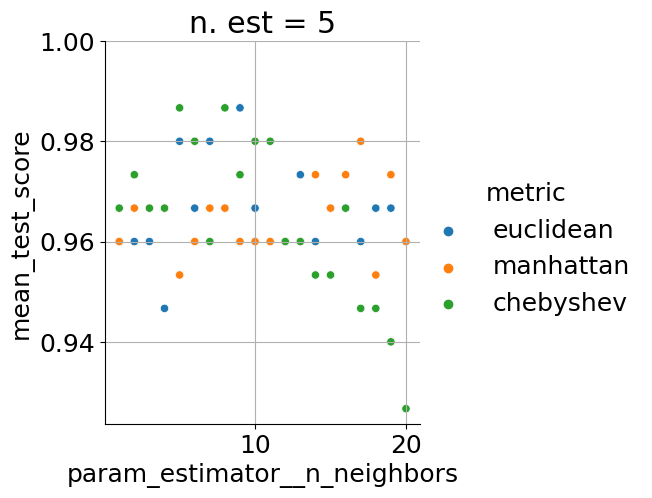

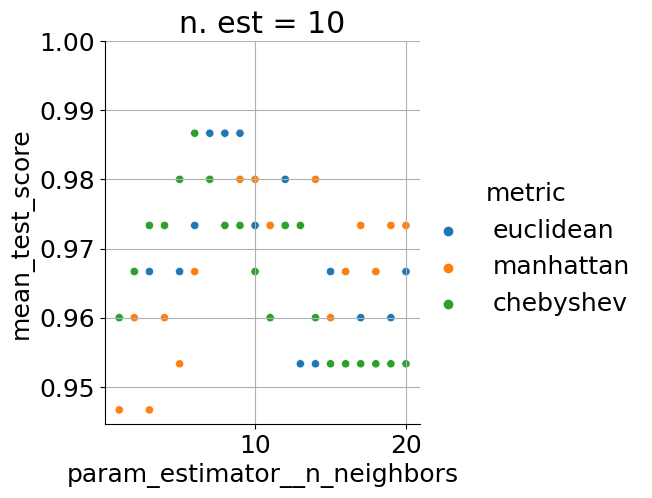

In [128]:
from sklearn.metrics import DistanceMetric

# def mahalanobis_custom(X, Y=None):
#     metric = DistanceMetric.get_metric('mahalanobis', V=[[1, 0], [0, 1]])
#     return metric.pairwise(X, Y)

plt.subplots(ncols=3)
for num_est in [2, 5, 10]:
    clf = BaggingClassifier(KNeighborsClassifier(), n_estimators=num_est)

    param_grid = {
        'estimator__n_neighbors': range(1, 21),
        'estimator__metric': ['euclidean', 'manhattan', 'chebyshev']
    }

    clf = BaggingClassifier(KNeighborsClassifier(), n_estimators=num_est)

    clf_grid = GridSearchCV(clf, param_grid=param_grid)
    clf_grid.fit(X, y)

    out = pd.DataFrame.from_dict(clf_grid.cv_results_)
    out["metric"]=out["param_estimator__metric"].apply(pd.Series).astype(str)

    
    g = sns.relplot(data = out, x = "param_estimator__n_neighbors", y = "mean_test_score", hue='metric')
    g.set(ylim=(None, 1))
    plt.title(f'n. est = {num_est}')